<div class=title>
<strong><center><font size="3">DAY 11 - IYKRA</font></center>
<hr>
<center><font size="5"><strong>Self-Practice 4</strong></font></center>
<center><font size="4"><strong>Foundation of Machine Learning</strong></font></center>
<hr>
<p style="text-align:center">Author</p>
<center>Joshua Effendi</center>
<p style="text-align:center">Date:</p>
<center>4 November 2019</center></strong>
</div>

<div class=title1>
    <b><font size='3'>Import Libraries</font></b>
</div>

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from datetime import datetime
from xgboost import XGBClassifier

from IPython.core.display import HTML

def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<div class=title1>
    <b><font size='3'>Import Data</font></b>
</div>

In [250]:
df_train = pd.read_csv('training_dataset.csv')
df_train

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111063,496554,EK3367,EK,Emirates,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111064,496555,PR3519,PR,Philippine Airlines,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111065,496556,QR5401,QR,Qatar Airways,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111066,496557,AK6431,AK,AirAsia,2018-11-30 23:55:00,2018-12-01 01:00:00,Kota Bharu,KBR,MY,2,...,MY,NaN,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 6m,7


In [251]:
df_test = pd.read_csv('test_dataset.csv')
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,...,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20


<div class=title1>
    <b><font size='3'>Data Cleansing</font></b>
</div>

In [252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [253]:
df_train.isnull().sum()

id                                0
number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            5
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        44209
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    41340
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          98981
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      58018
arrival_airport_timezone          0
flight_equipment_iata            19
flight_equipment_name            19
flight_duration                   3
delay                             0
dtype: int64

<div class=cbox>
    <b>From the train data, there are lots of missing data so we have to clean the data. Those features which has 20% more missing data will be dropped.</b>
</div>

In [254]:
df_train = df_train.drop(columns=['departure_airport_gate',
                                 'departure_airport_terminal',
                                 'arrival_airport_gate',
                                 'arrival_airport_terminal'])

<div class=cbox>
    <b>From the train data, drop features in which are not related to delay as business sense (logic).</b>
</div>

In [255]:
df_train_c = df_train.drop(columns=['id',
                                    'number',
                                    'airline_name',
                                    'departure_airport_code',
                                    'departure_airport_country',
                                    'departure_airport_region',
                                    'departure_airport_timezone',
                                   'arrival_airport_code',
                                   'arrival_airport_country',
                                   'arrival_airport_region',
                                   'arrival_airport_timezone',
                                   'flight_equipment_iata',
                                   'flight_equipment_name',
                                   'flight_duration'])
df_train_c.head()

,airline,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,arrival_airport_city,arrival_airport_name,delay
0,AK,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,Kota Bharu,Sultan Ismail Petra Airport,2
1,ID*,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,Jakarta,Soekarno-Hatta International Airport,8
2,MXD,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,Jakarta,Soekarno-Hatta International Airport,8
3,AK,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,Sandakan,Sandakan Airport,0
4,AK,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,Hanoi,Noi Bai International Airport,0


<div class=cbox>
    <b>From the train data, drop rows in which are still Nan.</b>
</div>

In [256]:
df_train_c = df_train_c.drop(index = df_train_c[df_train_c['scheduled_arrival_time'].isnull()].index).reset_index(drop=True)
df_train_c.isnull().sum()

airline                     0
scheduled_departure_time    0
scheduled_arrival_time      0
departure_airport_city      0
departure_airport_name      0
arrival_airport_city        0
arrival_airport_name        0
delay                       0
dtype: int64

<div class=cbox>
    <b>Change data type of object into DateTime.</b>
</div>

In [257]:
df_train_c['scheduled_departure_time'] = pd.to_datetime(df_train_c['scheduled_departure_time'], format='%Y-%m-%d')
df_train_c['scheduled_arrival_time'] = pd.to_datetime(df_train_c['scheduled_arrival_time'], format='%Y-%m-%d')

<div class=cbox>
    <b>Convert DateTime into several parts; Departure Hour and Day. Get the day because it has an effect on delay</b>
</div>

In [258]:
df_train_c1 = df_train_c.copy()
df_train_c1 = df_train_c1.drop(columns = ['arrival_airport_city','arrival_airport_name','departure_airport_city'])
df_train_c1.head()

,airline,scheduled_departure_time,scheduled_arrival_time,departure_airport_name,delay
0,AK,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur International Airport,2
1,ID*,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,8
2,MXD,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,8
3,AK,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur International Airport,0
4,AK,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur International Airport,0


In [259]:
df_train_c1['departure_hour'] = df_train_c1.scheduled_departure_time.apply(lambda x: x.hour)
df_train_c1['departure_day'] = df_train_c1.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
df_train_c1['arival_hour'] = df_train_c1.scheduled_arrival_time.apply(lambda x: x.hour)
df_train_c1 = df_train_c1.drop(columns=['scheduled_departure_time','scheduled_arrival_time'])
df_train_c1

,airline,departure_airport_name,delay,departure_hour,departure_day,arival_hour
0,AK,Kuala Lumpur International Airport,2,22,Friday,23
1,ID*,Kuala Lumpur International Airport,8,22,Friday,23
2,MXD,Kuala Lumpur International Airport,8,22,Friday,23
3,AK,Kuala Lumpur International Airport,0,22,Friday,1
4,AK,Kuala Lumpur International Airport,0,22,Friday,1
...,...,...,...,...,...,...
111058,EK,Sultan Ismail Petra Airport,0,22,Friday,23
111059,PR,Sultan Ismail Petra Airport,0,22,Friday,23
111060,QR,Sultan Ismail Petra Airport,0,22,Friday,23
111061,AK,Sultan Ismail Petra Airport,7,23,Friday,1


<div class=title1>
    <b><font size='3'>Data Test Cleaning</font></b>
</div>

<div class=cbox>
    <b>Do the data cleaning from data train to data test</b>
</div>

In [260]:
df_test = df_test.drop(columns=['departure_airport_gate',
                               'departure_airport_terminal',
                               'arrival_airport_gate',
                               'arrival_airport_terminal',
                               'id',
                               'number',
                               'airline_name',
                               'departure_airport_code',
                               'departure_airport_country',
                               'departure_airport_region',
                               'departure_airport_timezone',
                               'arrival_airport_code',
                               'arrival_airport_country',
                               'arrival_airport_region',
                               'arrival_airport_timezone',
                               'flight_equipment_iata',
                               'flight_equipment_name',
                               'flight_duration',
                               'arrival_airport_city',
                               'arrival_airport_name',
                               'departure_airport_city'])

In [261]:
df_test['scheduled_departure_time'] = pd.to_datetime(df_test['scheduled_departure_time'], format='%Y-%m-%d')
df_test['scheduled_arrival_time'] = pd.to_datetime(df_test['scheduled_arrival_time'], format='%Y-%m-%d')

In [262]:
df_test = df_test.drop(index = df_test[df_test['scheduled_arrival_time'].isnull()].index).reset_index(drop=True)
df_test.isnull().sum()

airline                     0
scheduled_departure_time    0
scheduled_arrival_time      0
departure_airport_name      0
delay                       0
dtype: int64

In [263]:
df_test['departure_hour'] = df_test.scheduled_departure_time.apply(lambda x: x.hour)
df_test['departure_day'] = df_test.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
df_test['arival_hour'] = df_test.scheduled_arrival_time.apply(lambda x: x.hour)
df_test = df_test.drop(columns=['scheduled_departure_time','scheduled_arrival_time'])
df_test.head()

,airline,departure_airport_name,delay,departure_hour,departure_day,arival_hour
0,CZ,Kuala Lumpur International Airport,15,0,Saturday,4
1,MH,Kuala Lumpur International Airport,15,0,Saturday,4
2,TK,Kuala Lumpur International Airport,27,0,Saturday,2
3,AK,Kuala Lumpur International Airport,95,0,Saturday,1
4,UA,Kuala Lumpur International Airport,20,0,Saturday,6


<div class=title1>
    <b><font size='3'>Data Processing</font></b>
</div>

<div class=title1>
    <b><font size='2'>Provide travel recommendation to passenger (best time to take a flight or best airline), so they will
not get caught in delay. Each recommendation has to be supported by at least 1 graph.</font></b>
</div>

In [264]:
df_train_c1_ga = df_train_c.groupby('airline').mean().sort_values('delay')[0:10]

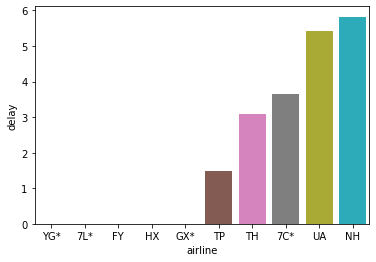

In [265]:
sns.barplot(df_train_c1_ga.index, df_train_c1_ga['delay'])

<div class=cbox>
    <b>From the graph above, there are 5 airlines that have 0 delay.</b>
</div>

In [266]:
df_train_c1_gt = df_train_c1.groupby('departure_hour').mean().sort_values('delay')[0:10]

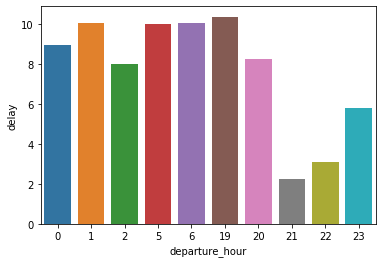

In [267]:
sns.barplot(df_train_c1_gt.index, df_train_c1_gt['delay'])

<div class=cbox>
    <b>From the graph above, there is 1 time that has the lowest delay that is 21 or 9PM.</b>
</div>

<div class=cbox>
    <b>Data in Airline Unique and in Departure Airport Name Unique has to be the same size.</b>
</div>

In [268]:
print(len(df_train_c1['airline'].unique()))
print(len(df_test['airline'].unique()))

103
101


In [269]:
aln = []
for i in df_train_c1['airline'].unique():
    if i not in df_test['airline'].unique():
        aln.append(i)
for i in df_test['airline'].unique():
    if i not in df_train_c1['airline'].unique():
        aln.append(i)

In [270]:
aln

['GX*', 'LD', 'UW*', 'TOM']

In [271]:
df_train_c1 = df_train_c1[(df_train_c1['airline'] != aln[0]) & (df_train_c1['airline'] != aln[1]) & (df_train_c1['airline'] != aln[2]) & (df_train_c1['airline'] != aln[3])].reset_index(drop=True)
df_test = df_test[(df_test['airline'] != aln[0]) & (df_test['airline'] != aln[1]) & (df_test['airline'] != aln[2]) & (df_test['airline'] != aln[3])].reset_index(drop=True)

In [272]:
print(len(df_train_c1['airline'].unique()))
print(len(df_test['airline'].unique()))

100
100


In [273]:
print(len(df_train_c1['departure_airport_name'].unique()))
print(len(df_test['departure_airport_name'].unique()))

16
17


In [274]:
dan = []
for i in df_train_c1['departure_airport_name'].unique():
    if i not in df_test['departure_airport_name'].unique():
        dan.append(i)
for i in df_test['departure_airport_name'].unique():
    if i not in df_train_c1['departure_airport_name'].unique():
        dan.append(i)

In [275]:
dan

['Mulu Airport']

In [276]:
df_train_c1 = df_train_c1[df_train_c1['departure_airport_name'] != dan[0]].reset_index(drop=True)
df_test = df_test[df_test['departure_airport_name'] != dan[0]].reset_index(drop=True)

In [277]:
print(len(df_train_c1['departure_airport_name'].unique()))
print(len(df_test['departure_airport_name'].unique()))

16
16


In [278]:
df_train_c1_delay = df_train_c1[['delay']]
df_train_c1 = df_train_c1.drop(columns='delay')

<div class=cbox>
    <b>Divide into two types data, Numerical and Categorical Data</b>
</div>

In [279]:
numerical_data = df_train_c1.select_dtypes(include = [np.number]).columns
categorical_data = df_train_c1.select_dtypes(exclude = [np.number]).columns

<div class=title1>
    <b><font size='2'>Create a model to estimate the delay duration ( Linear Regression )</font></b>
</div>

In [280]:
datasets_dummies = pd.get_dummies(df_train_c1[categorical_data], drop_first=True)

In [281]:
df_model = pd.concat([df_train_c1[numerical_data], datasets_dummies, df_train_c1_delay], axis = 1)
df_model.head()

,departure_hour,arival_hour,airline_5J,airline_6E,airline_7C*,airline_7L*,airline_8L,airline_8M,airline_9C,airline_9W,...,departure_airport_name_Sibu Airport,departure_airport_name_Sultan Abdul Aziz Shah Airport,departure_airport_name_Sultan Ismail Petra Airport,departure_day_Monday,departure_day_Saturday,departure_day_Sunday,departure_day_Thursday,departure_day_Tuesday,departure_day_Wednesday,delay
0,22,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,22,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,22,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
datasets_dummies = pd.get_dummies(df_test[categorical_data], drop_first=True)

In [284]:
df_model_test = pd.concat([df_test[numerical_data], datasets_dummies, df_test['delay']], axis = 1)
df_model_test.head()

,departure_hour,arival_hour,airline_5J,airline_6E,airline_7C*,airline_7L*,airline_8L,airline_8M,airline_9C,airline_9W,...,departure_airport_name_Sibu Airport,departure_airport_name_Sultan Abdul Aziz Shah Airport,departure_airport_name_Sultan Ismail Petra Airport,departure_day_Monday,departure_day_Saturday,departure_day_Sunday,departure_day_Thursday,departure_day_Tuesday,departure_day_Wednesday,delay
0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15
1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,27
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,95
4,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,20


In [285]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1].values.reshape(-1,1)
x = preprocessing.normalize(x)

<div class=cbox>
    <b>Check Data Correlation</b>
</div>

In [286]:
np.abs(df_model.corr(method= 'pearson')['delay']).sort_values(ascending=False)[1:11]

airline_MXD                                                  0.104352
airline_FY                                                   0.088172
departure_airport_name_Kuala Lumpur International Airport    0.079108
departure_airport_name_Sultan Abdul Aziz Shah Airport        0.078748
airline_CV                                                   0.077460
arival_hour                                                  0.073624
airline_MH                                                   0.059698
airline_RA                                                   0.050349
airline_AK                                                   0.048149
airline_JT*                                                  0.044321
Name: delay, dtype: float64

In [287]:
regression = LinearRegression(normalize=True)
regression.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [288]:
x_test = df_model_test.iloc[:,0:len(df_model.columns)-1]
y_test = df_model_test.iloc[:,len(df_model.columns)-1].values.reshape(-1,1)
x_test = preprocessing.normalize(x_test)

In [289]:
y_pred = regression.predict(x_test)

In [290]:
print("MSE Y Test = ", mean_squared_error(y_pred,y_test))

MSE Y Test =  970.8974046105051


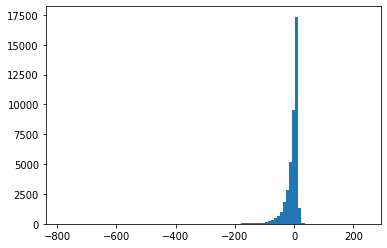

In [291]:
res = y_pred - y_test

plt.hist(res, bins=100)
plt.show()

In [292]:
data_lin_res = df_test[['delay']].copy()
data_lin_res['delay_model'] = y_pred

In [293]:
data_lin_res.head(20)

,delay,delay_model
0,15,17.678223
1,15,13.171654
2,27,24.365358
3,95,10.410234
4,20,3.903615
5,20,9.200937
6,27,28.345267
7,16,9.114804
8,20,3.370524
9,16,9.114804


<div class=title1>
    <b><font size='2'>Create a model to predict delay > 60 min ( Logistic regression and another supervised model you
choosing )</font></b>
</div>

<div class=title1>
    <b><font size='2'>Logistic Regression</font></b>
</div>

In [35]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]

In [36]:
log_regression = LogisticRegression(solver='lbfgs',multi_class='auto')
log_regression.fit(x, y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
x_test = df_model_test.iloc[:,0:len(df_model.columns)-1]
y_test = df_model_test.iloc[:,len(df_model.columns)-1]

In [38]:
y_pred = regression.predict(x_test)

In [39]:
print("MSE Y Test = ", mean_squared_error(y_pred,y_test))

MSE Y Test =  9019.918050453938


In [41]:
data_log_res = df_test[['delay']].copy()
data_log_res['delay_model'] = y_pred

In [42]:
data_log_res.head(20)

,delay,delay_model
0,2,-57.274321
1,8,9.418162
2,8,-19.083960
3,0,-178.551204
4,0,-178.551204
5,0,-57.274321
6,0,-57.274321
7,0,-173.038619
8,0,-57.274321
9,0,-184.063790


<div class=title1>
    <b><font size='2'>XGBoost</font></b>
</div>

In [43]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]

In [44]:
xgb = XGBClassifier()
xgb.fit(x, y)

KeyboardInterrupt: 

In [ ]:
x_test = df_model_test.iloc[:,0:len(df_model.columns)-1]
y_test = df_model_test.iloc[:,len(df_model.columns)-1]

In [ ]:
y_pred = regression.predict(x_test)

In [ ]:
print("MSE Y Test = ", mean_squared_error(y_pred,y_test))

In [ ]:
res = y_pred - y_test

plt.hist(res, bins=100)
plt.show()

In [ ]:
data_xgb_res = df_test[['delay']].copy()
data_xgb_res['delay_model'] = y_pred

In [ ]:
data_xgb_res.head(20)

['AK', 'ID*', 'MXD', 'RX', 'D7', 'NH', 'UA', 'AC', 'EK', 'QR', 'MH', 'JT*', 'GA', 'MI', 'SQ', 'CZ', '9W', 'TK', 'WE*', 'TG', 'PR', 'AA', 'WY', 'KL', 'UL', 'QZ', 'QF', '3K', 'MF', 'VA', 'CX', 'KA', 'NZ', 'CA', 'ZH', 'PG', '8M', 'CI', 'AI', 'JL', 'TR', 'IB', 'FD', 'Z2', 'EY', 'MK', 'IA', 'BI', 'VJC', 'LH', 'AY', 'KE', '8L', 'HA', 'DL', 'BR', 'BS*', 'FM', 'MU', 'AF', 'LX', 'KQ', 'VN', 'K6', 'SV', 'XY', 'HM', 'AZ', 'SK', 'ET', 'MS', 'OS', 'RJ', 'BA', 'W5', 'TH', 'LJ', 'ZE', 'FY', 'SJ', 'CTV', 'IW', 'CV', 'KC', 'HX', '7L*', 'RA', 'PK', 'H9*', 'HY', 'YG*', 'TP', '5J', 'BG', 'RS*', 'OZ', '7C*', '9C', 'DE', '6E']
